In [27]:
#Ebrahim Kadodia Ice Task 4 Rock Paper Scissors
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
#Image Preprocessing
base_dir = '../rps/'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'validation')

paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scissors_dir = os.path.join(train_dir, 'scissors')

paper_imgs = os.listdir(paper_dir)
rock_imgs = os.listdir(rock_dir)
scissors_imgs = os.listdir(scissors_dir)

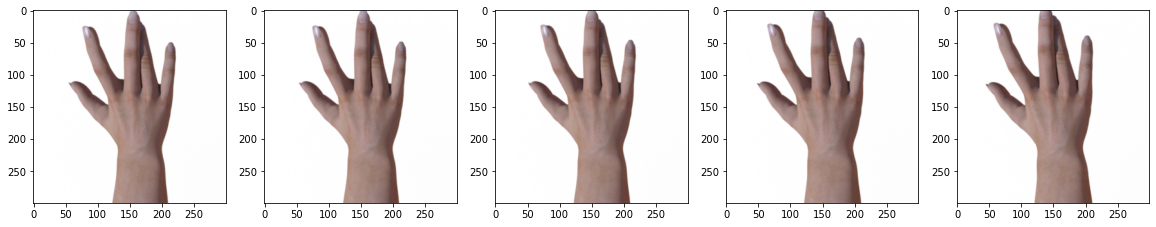

In [47]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(paper_dir, img_path))
    plt.imshow(img)
plt.show()

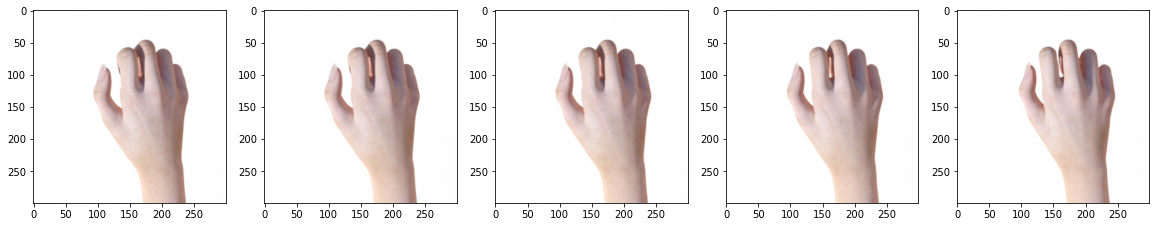

In [48]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(rock_dir, img_path))
    plt.imshow(img)
plt.show()

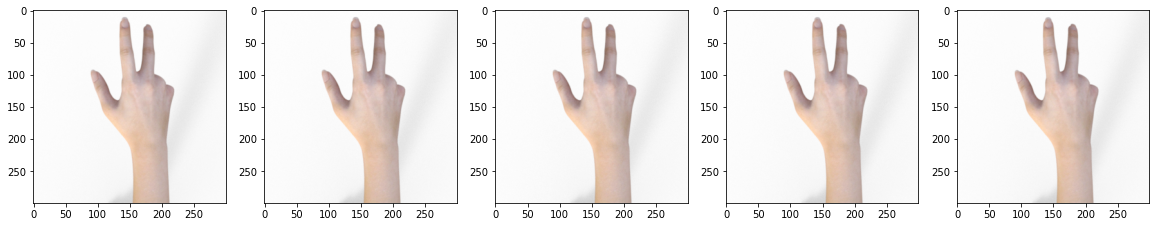

In [49]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(scissors_dir, img_path))
    plt.imshow(img)
plt.show()

In [50]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [51]:
BATCH_SIZE = 32
TARGET_SIZE = 64
EPOCHS = 10

In [52]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                    batch_size=BATCH_SIZE, 
                                                    shuffle=True,
                                                    class_mode='categorical')

val_generator = validation_datagen.flow_from_directory(val_dir,
                                                       target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                       batch_size=BATCH_SIZE, 
                                                       shuffle=True,
                                                       class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [53]:
#Callbacks
#Below I load my Keras Callbacks to monitor the training of the model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [57]:
#Training Model
history = model.fit_generator(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    verbose=1)

C:\Users\user-pc\AppData\Local\Temp/ipykernel_24964/40339369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
79/79 [==============================] - 21s 255ms/step - loss: 0.6501 - accuracy: 0.7135 - val_loss: 0.4172 - val_accuracy: 0.7903
Epoch 2/10
79/79 [==============================] - 8s 106ms/step - loss: 0.0839 - accuracy: 0.9774 - val_loss: 0.1698 - val_accuracy: 0.9220
Epoch 3/10
79/79 [==============================] - 8s 105ms/step - loss: 0.0275 - accuracy: 0.9929 - val_loss: 0.2599 - val_accuracy: 0.8737
Epoch 4/10
79/79 [==============================] - 8s 105ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.2844 - val_accuracy: 0.8925
Epoch 5/10
79/79 [==============================] - 8s 105ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.2854 - val_accuracy: 0.8656
Epoch 6/10
79/79 [==============================] - 8s 106ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.1545 - val_accuracy: 0.9382
Epoch 7/10
79/79 [==============================] - 9s 108ms/step - loss: 0.0104 - accuracy: 0.9960 - val_loss: 0.1748 - val_accuracy: 0.9140
Epoch

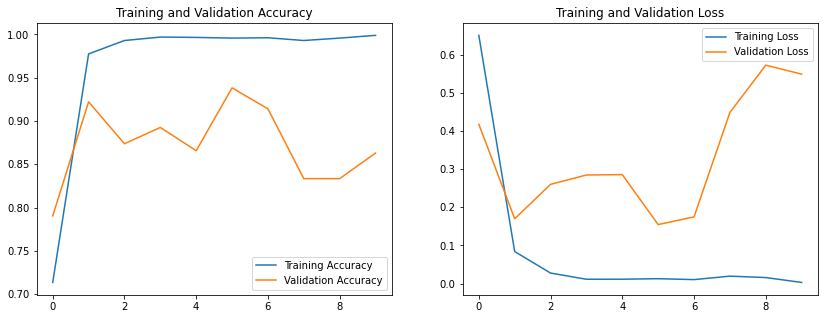

C:\Users\user-pc\AppData\Local\Temp/ipykernel_24964/3729870514.py:18: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model_score = model.evaluate_generator(val_generator,steps=20)


Model Test Loss: 0.5485295653343201
Model Test Accuracy: 0.8629032373428345


In [60]:
#Model Evaluation
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./RPSPlot.png')
plt.show()

model_score = model.evaluate_generator(val_generator,steps=20)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])